In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def pre_config():
    plt.rcParams.update({'font.size': 20})
    %matplotlib inline
    

In [3]:
pre_config()

In [4]:
def load_dataset():
    df_etf = pd.read_csv('dataset/ETFs.csv', index_col=False)
    df_mf = pd.read_csv('dataset/Mutual Funds.csv', index_col=False)

    return df_etf, df_mf

In [5]:
df_etf, df_mf = load_dataset()

In [6]:
def types(df):
    for c, t in zip(df, df.dtypes):
        if np.issubdtype(t, np.number):
            print("Num", c, t)
        else:
            print("Str", c, t)

In [7]:
types(df_etf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Str legal_type object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num price_earnings float64
Num price_book float64
Num price_sales float64
Num price_cashflow float64
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num rating_us_government float64
Num rating_aaa float64
Num rating_aa float64
Num rating_a float64
Num rating_bbb float64
Num rating_bb float64
Num rating_b float64
Num rating_below_b float64
Num rating_others float64
Num

In [8]:
def describe(df):
    print("DataFrame summary:")
    print(df.info())
    print()

    print("Columns summary:")
    for col in list(df):
        print(col)
        print(df[col].dropna().describe())
        print(df[col].dropna().value_counts())
        print()
  

In [9]:
     
describe(df_etf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Columns: 104 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(94), object(10)
memory usage: 1.9+ MB
None

Columns summary:
fund_name
count     2352
unique    2352
top       EWEM
freq         1
Name: fund_name, dtype: object
EWEM    1
HTRB    1
ECH     1
HEFA    1
GENY    1
       ..
UDN     1
DJP     1
XSD     1
JMOM    1
JHMH    1
Name: fund_name, Length: 2352, dtype: int64

fund_extended_name
count                           2352
unique                          2340
top       iShares JPX-Nikkei 400 ETF
freq                               2
Name: fund_extended_name, dtype: object
iShares JPX-Nikkei 400 ETF                    2
iShares $ Treasury Bd 7-10yr ETFUSD Dist      2
iShares Core High Dividend ETF                2
CSOP FTSE China A50 ETF                       2
iShares S&P 100 ETF                           2
                                             ..
iShares Curre

0.0    2348
Name: rating_us_government, dtype: int64

rating_aaa
count    2348.000000
mean        4.494267
std        17.908627
min        -0.670000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: rating_aaa, dtype: float64
0.00      2066
100.00      48
1.79         3
56.23        3
0.46         3
          ... 
1.74         1
0.77         1
1.72         1
96.81        1
3.31         1
Name: rating_aaa, Length: 223, dtype: int64

rating_aa
count    2348.000000
mean        1.441946
std         7.329886
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: rating_aa, dtype: float64
0.00     2141
7.75        3
0.71        2
4.88        2
3.46        2
         ... 
14.92       1
7.38        1
51.19       1
1.43        1
27.29       1
Name: rating_aa, Length: 200, dtype: int64

rating_a
count    2348.000000
mean        2.008083
std         7.671555
min         0.000000
25%         0.000000
50

 0.00    1285
 1.00      34
 0.99      21
 1.02      20
 0.98      19
         ... 
-2.31       1
-1.89       1
-2.02       1
-2.36       1
 4.90       1
Name: fund_beta_10years, Length: 210, dtype: int64

category_beta_10years
count    1131.000000
mean        0.930619
std         1.029948
min        -7.680000
25%         0.970000
50%         1.040000
75%         1.140000
max         2.520000
Name: category_beta_10years, dtype: float64
 1.00    114
 1.04     93
 0.97     81
 1.18     69
 0.96     58
 1.10     48
 1.07     43
 1.14     41
 1.01     36
 0.98     35
 1.21     35
 0.85     34
 0.73     34
 1.12     32
 1.09     31
 1.28     30
 1.20     23
 0.64     22
 1.08     22
 0.95     22
 1.06     21
 1.26     21
 1.82     20
 0.60     19
 1.45     18
-7.68     15
 0.82     15
 1.17     15
 0.57     14
 1.49     12
 0.66     11
 0.48     10
 0.21      9
 2.52      8
 1.32      6
 0.84      6
 0.88      5
 1.63      3
Name: category_beta_10years, dtype: int64

fund_mean_annual_return

In [10]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

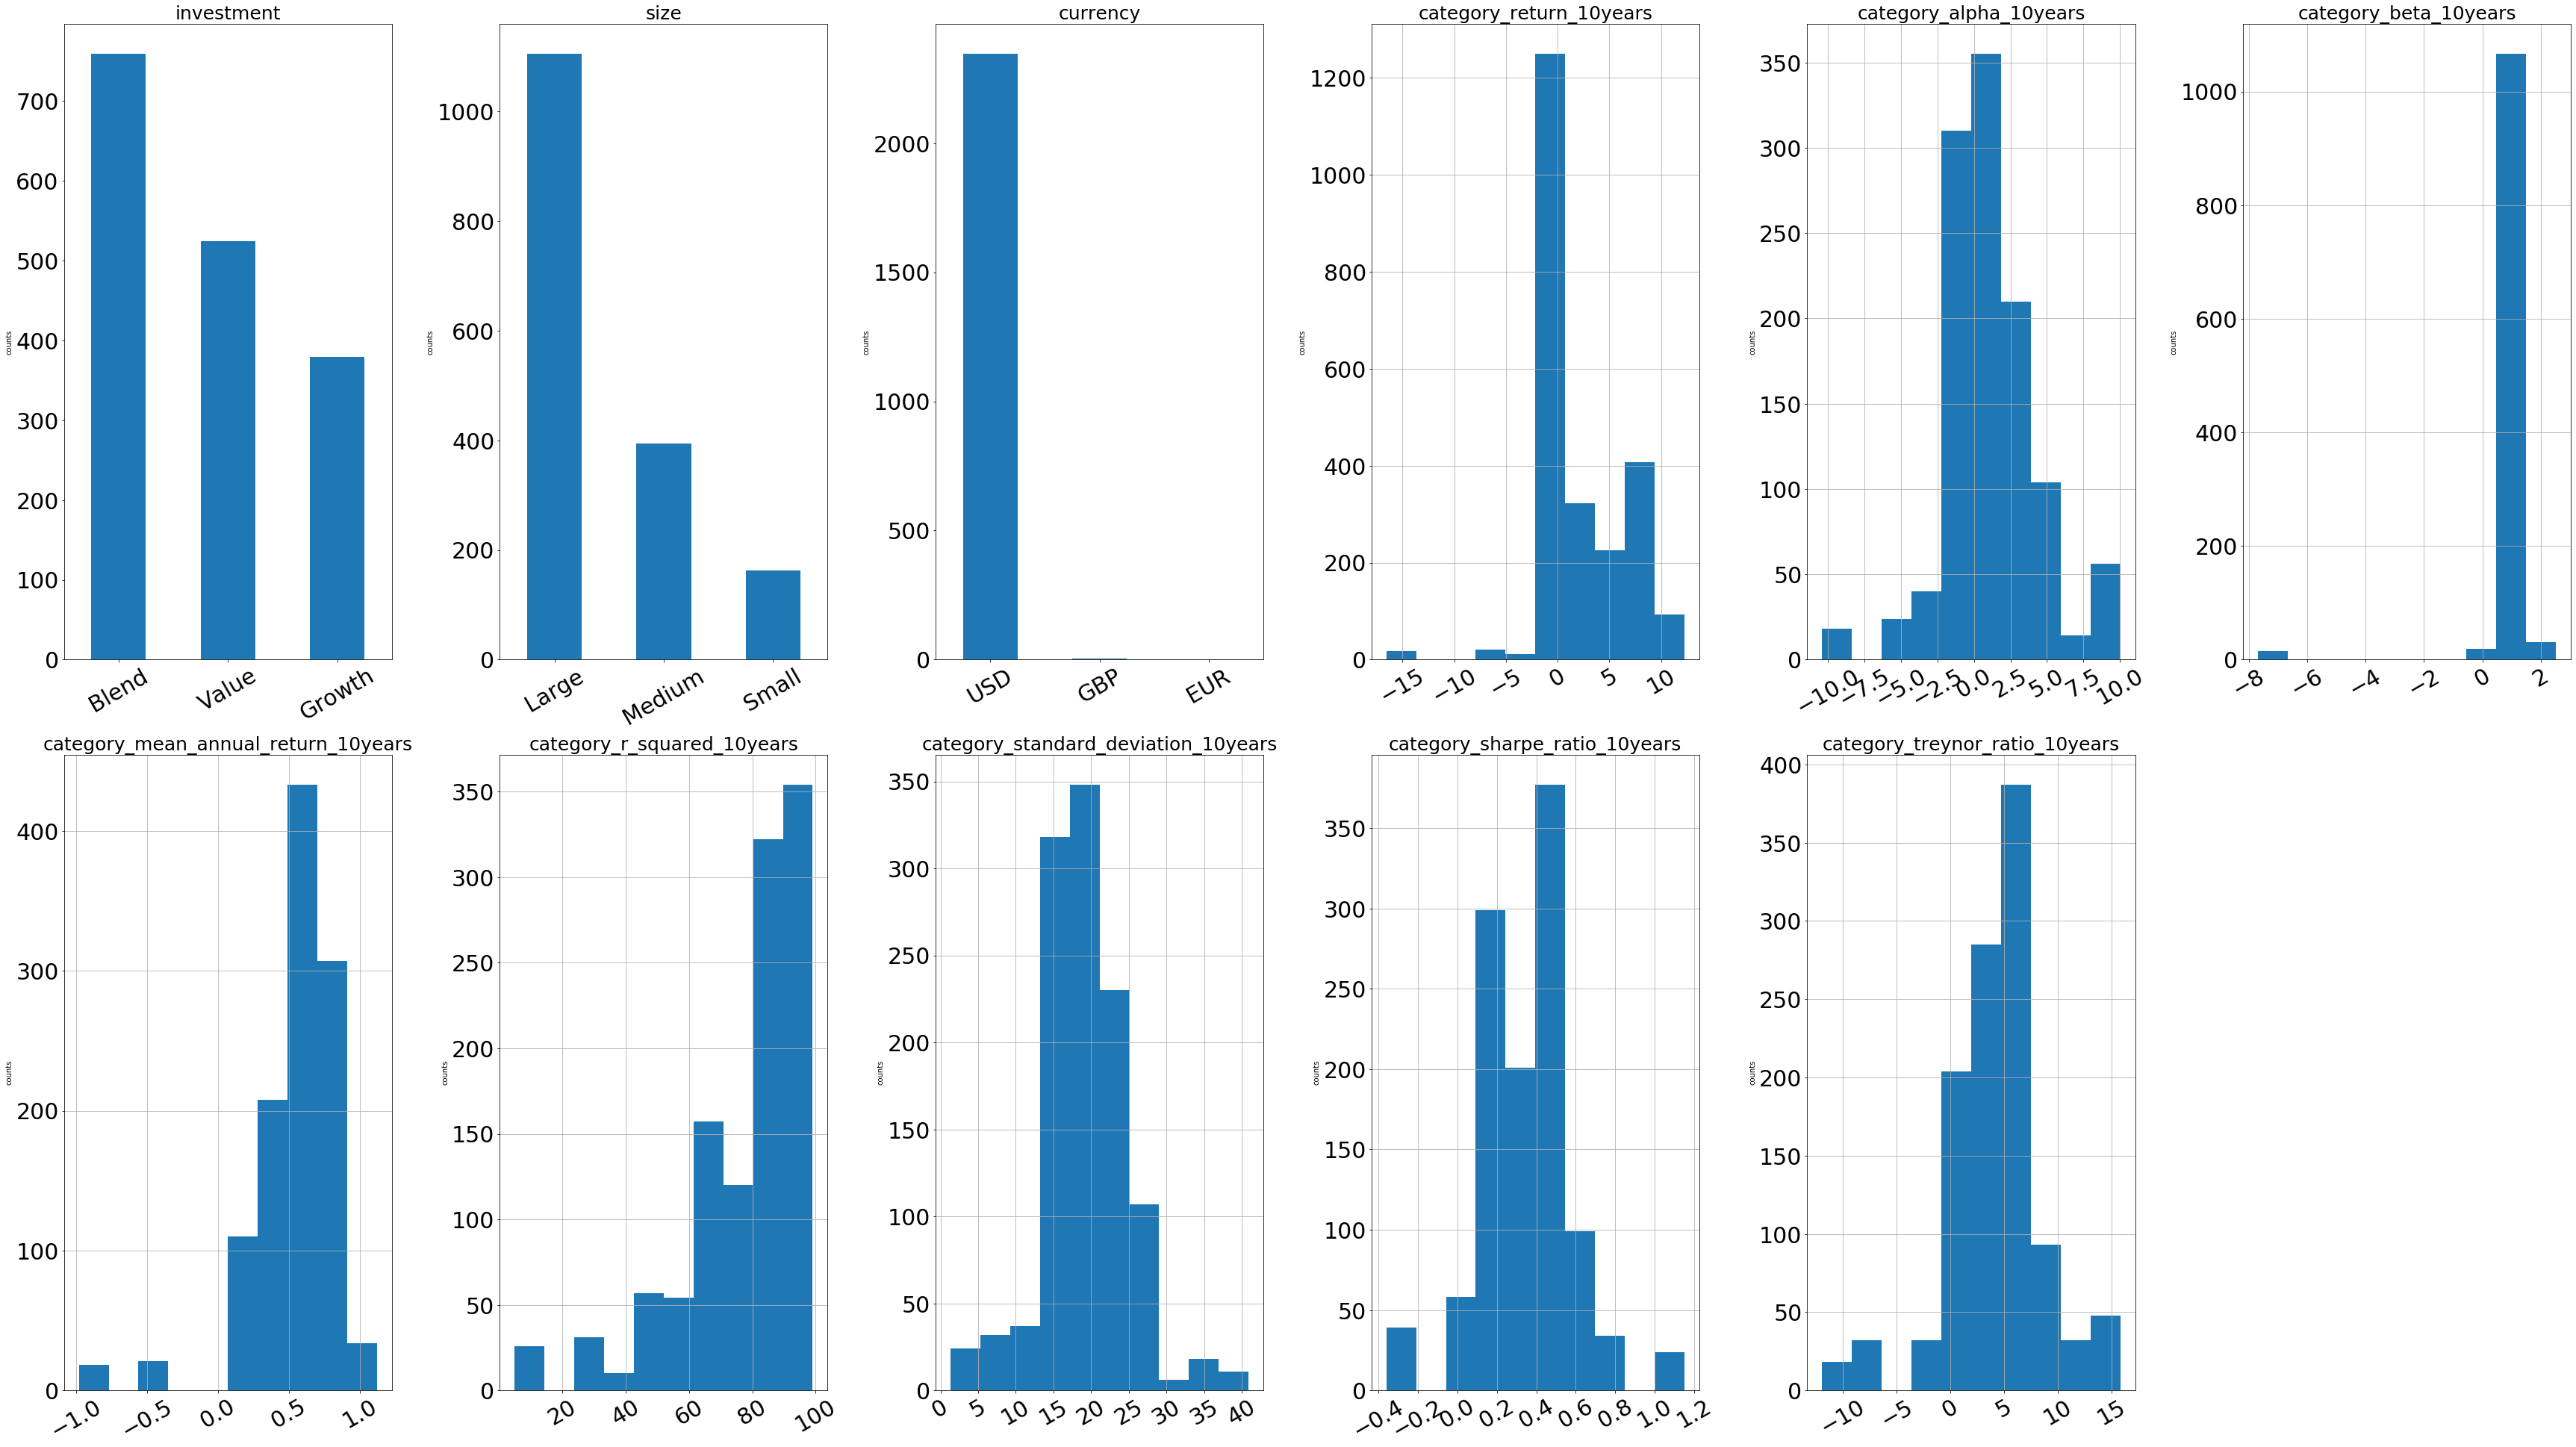

In [11]:
hist_bar_plot(df_etf)

In [12]:
def correlation_clean(df, threshold=(-0.9, -0.3, 0.3, 0.9)):
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [13]:
df_etf = correlation_clean(df_etf)

In [14]:
def corr_mtx(df, fig_size=50, unique=True):
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)
    

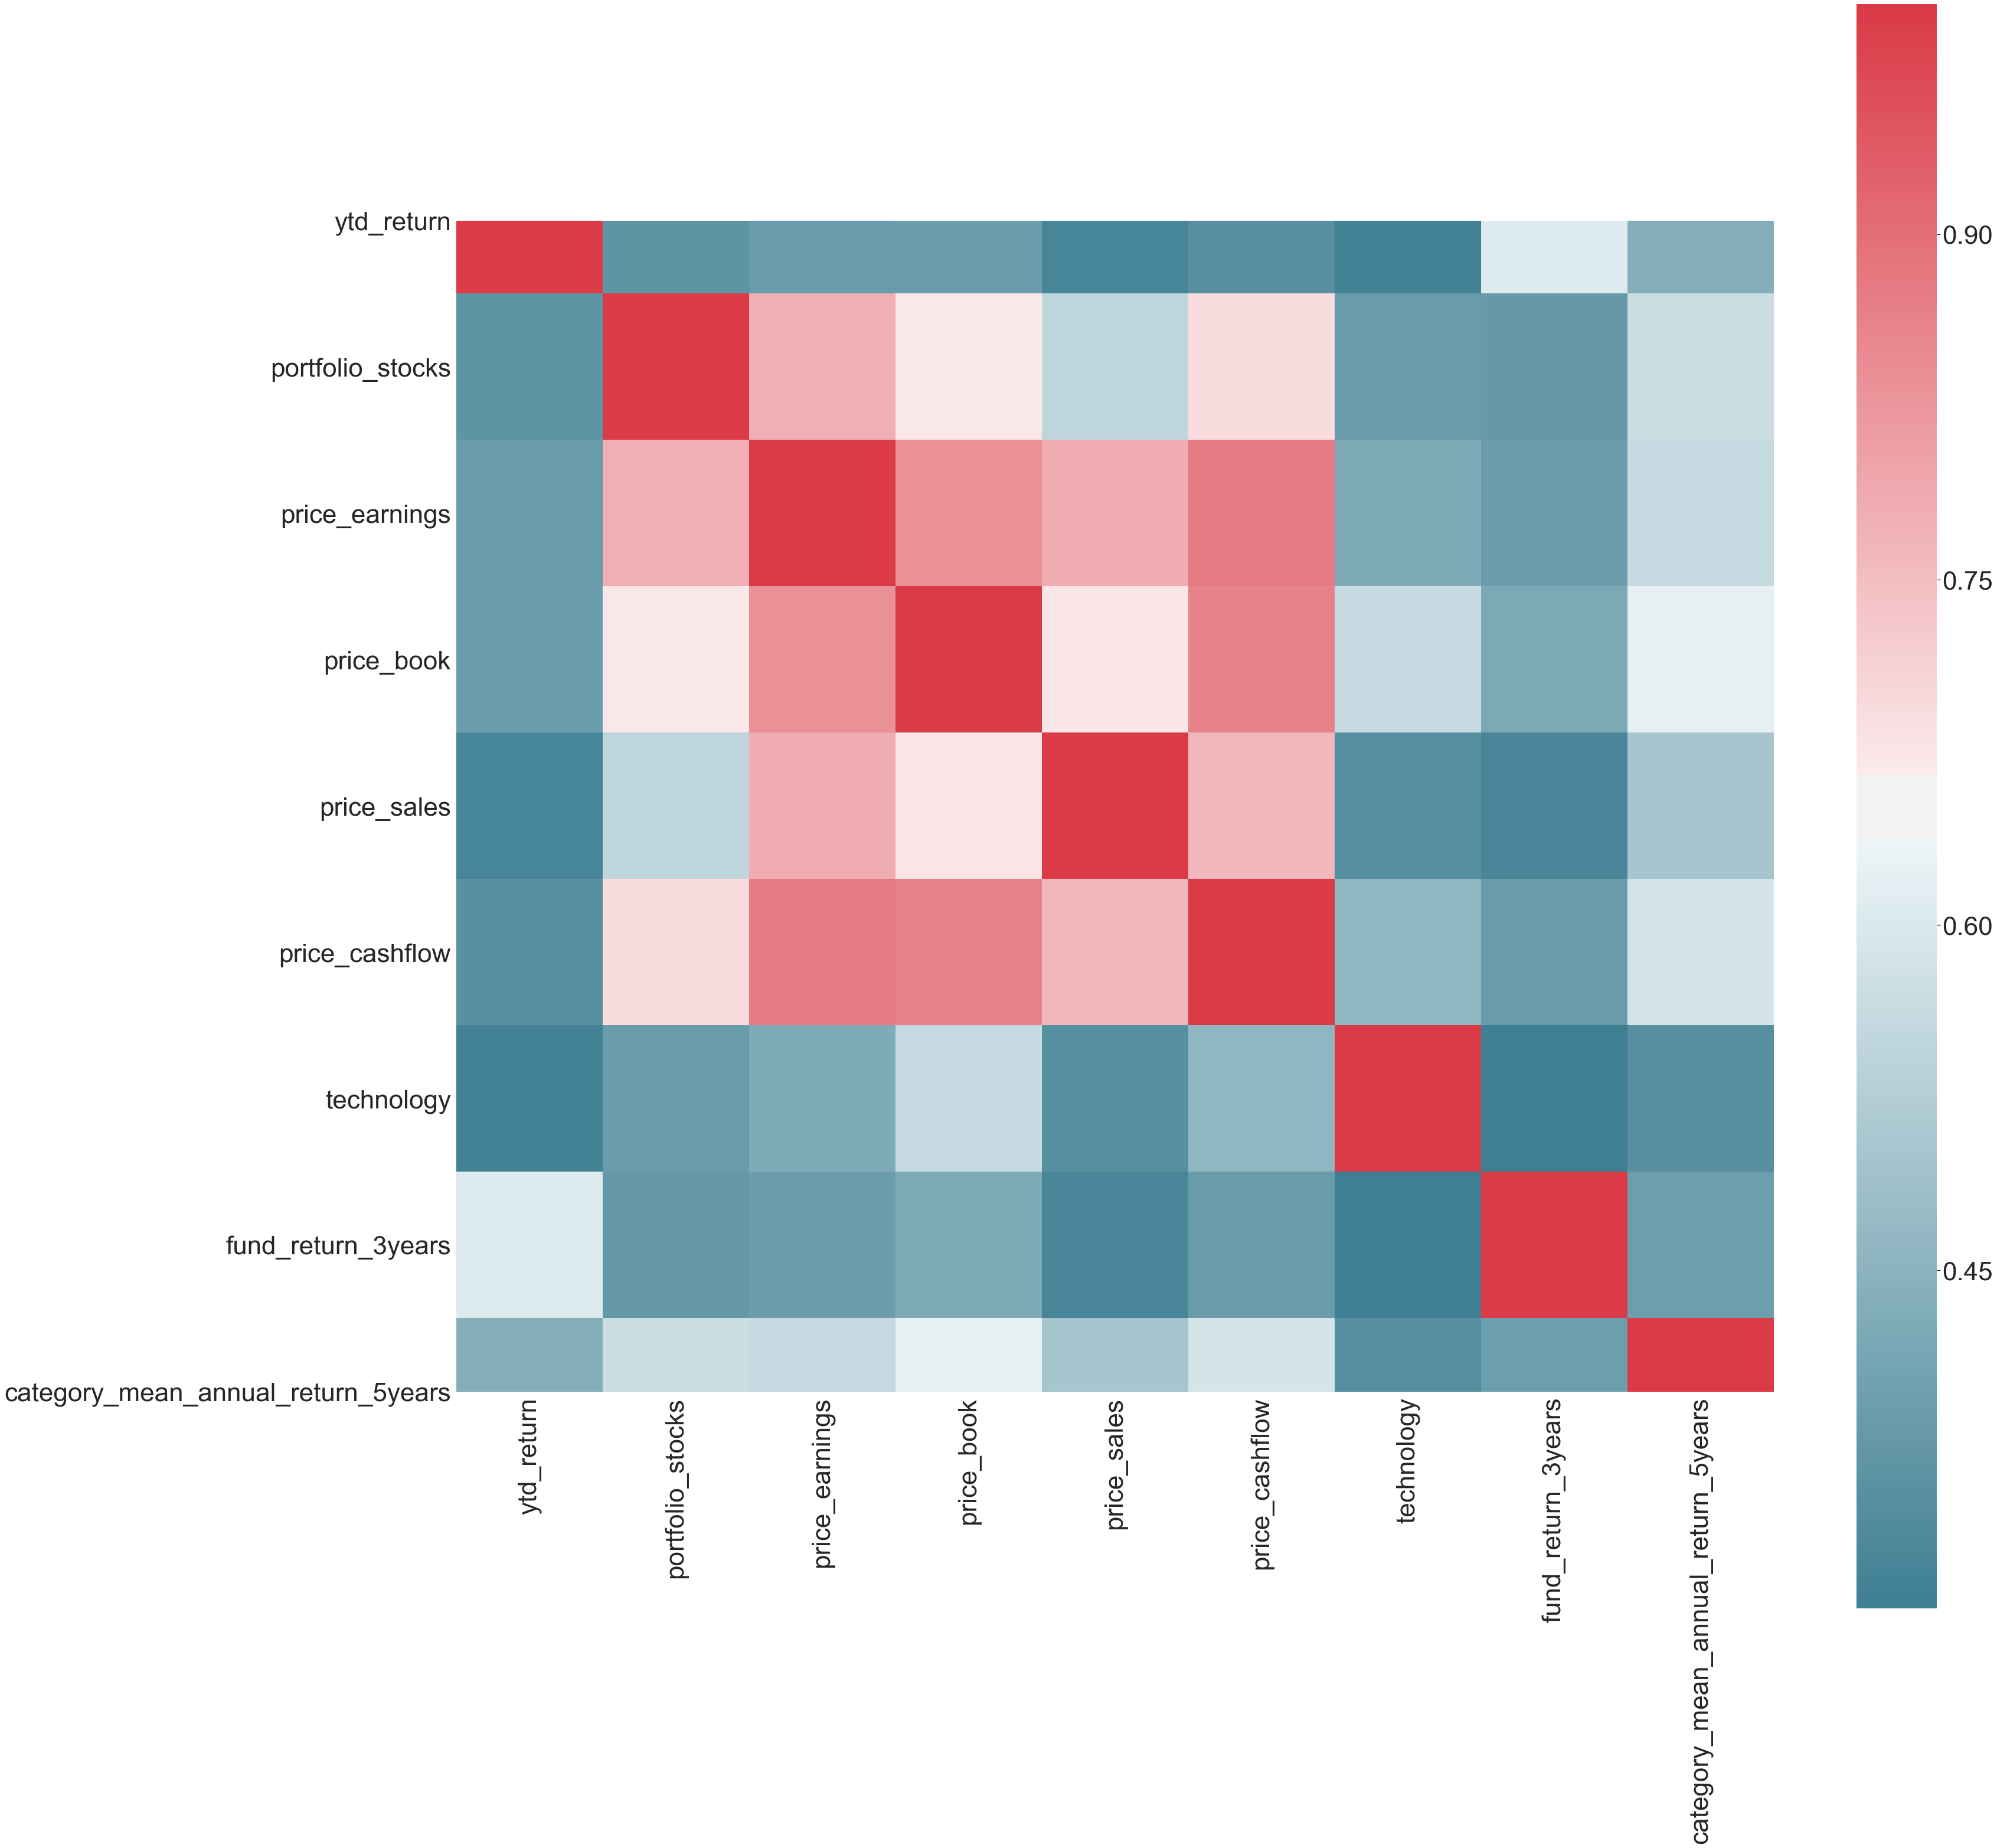

In [15]:
corr_mtx(df_etf, unique=False)

In [16]:
def scatter_mtx(df, figsize=50, cap=10):
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(figsize, figsize), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

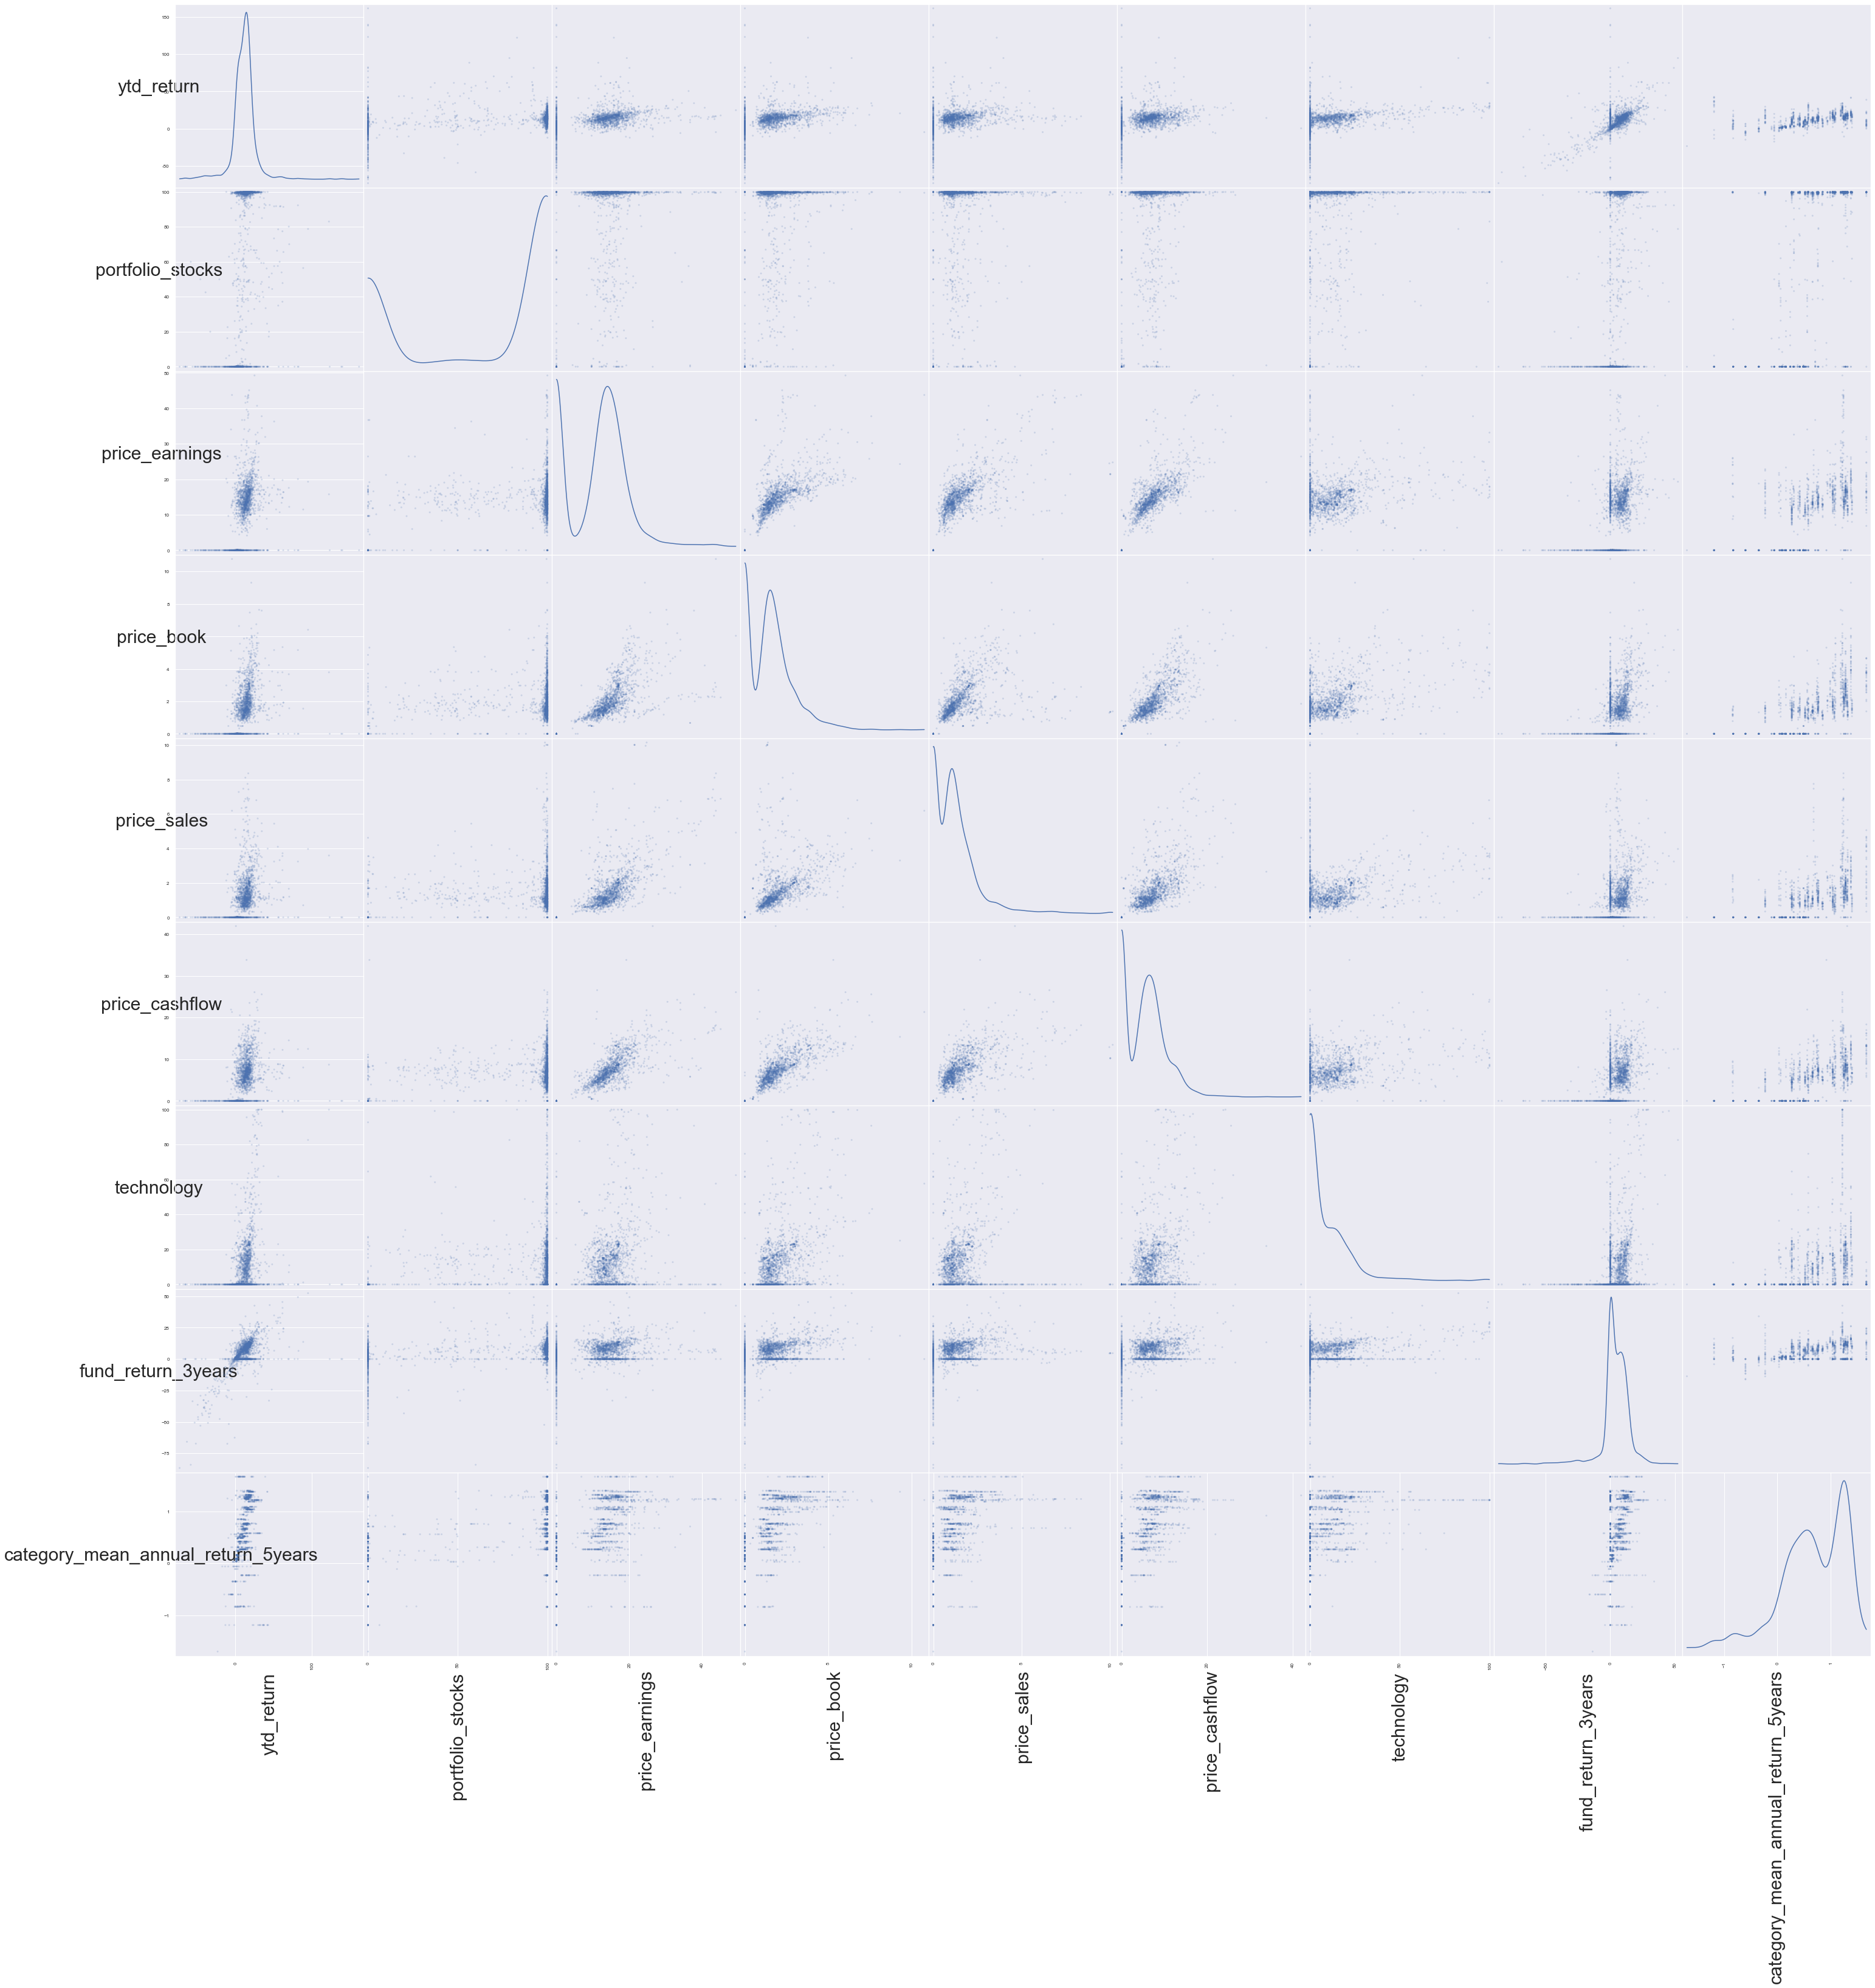

In [17]:
scatter_mtx(df_etf)

In [18]:
types(df_mf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Num morningstar_rating int64
Str inception_date object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_cash float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num portfolio_others float64
Num portfolio_preferred float64
Num portfolio_convertable float64
Str price_earnings object
Num price_book float64
Str price_sales object
Str price_cashflow object
Str median_market_cap object
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num bond_maturity float64
Num bond_durat

In [19]:
describe(df_mf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB
None

Columns summary:
fund_name
count     25308
unique    25308
top       JLBHX
freq          1
Name: fund_name, dtype: object
JLBHX    1
PDJFX    1
MDDAX    1
MMBZX    1
EKGYX    1
        ..
CRSRX    1
SDIVX    1
PDBAX    1
OAKIX    1
OGGQX    1
Name: fund_name, Length: 25308, dtype: int64

fund_extended_name
count                                                 25308
unique                                                25265
top       Fidelity Income Fund - Fidelity Income Replace...
freq                                                      4
Name: fund_extended_name, dtype: object
Fidelity Income Fund - Fidelity Income Replacement 2016 Fund                       4
MainStay Funds Trust - MainStay Epoch Global Choice Fund                           4
Hatteras 

0.00     10403
3.50       102
3.49       101
2.42        95
2.45        90
         ...  
9.35         1
8.91         1
9.76         1
11.46        1
5.18         1
Name: communication_services, Length: 981, dtype: int64

energy
count    25193.000000
mean         5.833272
std         13.705346
min          0.000000
25%          0.000000
50%          3.380000
75%          6.260000
max        100.000000
Name: energy, dtype: float64
0.00      9018
100.00     244
5.42        89
5.40        89
5.43        88
          ... 
15.65        1
12.39        1
25.76        1
14.20        1
2.25         1
Name: energy, Length: 1459, dtype: int64

industrials
count    25193.000000
mean         9.054772
std         10.190584
min          0.000000
25%          0.000000
50%          9.550000
75%         12.740000
max        100.000000
Name: industrials, dtype: float64
0.00      7463
10.23       69
100.00      69
10.31       64
11.02       61
          ... 
18.63        1
7.54         1
30.48        1
12

-0.01     29
-0.29     27
 6.40     26
 6.52     26
 5.34     25
          ..
 16.68     1
-20.54     1
 27.14     1
-5.74      1
 27.81     1
Name: fund_return_2016, Length: 3739, dtype: int64

category_return_2016
count    22175.000000
mean         7.280096
std          6.801143
min        -21.110000
25%          3.230000
50%          6.230000
75%         10.370000
max         54.810000
Name: category_return_2016, dtype: float64
3.23     2098
10.37    1151
14.81    1032
5.54      749
8.47      669
         ... 
6.05       18
0.65       15
5.32       13
32.05      13
10.24       2
Name: category_return_2016, Length: 101, dtype: int64

fund_return_2015
count    19549.000000
mean        -1.962949
std          6.370253
min        -62.110000
25%         -3.810000
50%         -1.160000
75%          1.040000
max         86.620000
Name: fund_return_2015, dtype: float64
 0.00     42
-0.87     36
-1.50     35
-0.04     35
-1.12     35
          ..
-15.73     1
-23.92     1
 8.89      1
-14.80 

100.00    67
99.99     31
97.42     24
97.34     22
96.31     21
          ..
3.72       1
41.74      1
19.87      1
65.71      1
5.50       1
Name: fund_r_squared_3years, Length: 6920, dtype: int64

category_r_squared_3years
count    25200.000000
mean         0.716286
std          0.250925
min          0.000000
25%          0.630000
50%          0.810000
75%          0.890000
max          0.970000
Name: category_r_squared_3years, dtype: float64
0.84    2661
0.88    1684
0.95    1507
0.92    1507
0.81    1412
0.67    1020
0.89     967
0.04     956
0.60     936
0.96     889
0.73     861
0.70     847
0.90     741
0.68     691
0.97     576
0.42     514
0.87     498
0.82     457
0.50     448
0.94     424
0.78     387
0.29     328
0.14     312
0.74     306
0.25     294
0.85     290
0.69     255
0.55     250
0.63     242
0.71     232
0.30     231
0.75     222
0.17     215
0.59     214
0.53     203
0.00     187
0.57     163
0.08     144
0.72     132
0.56     105
0.83     101
0.35      91
0.48

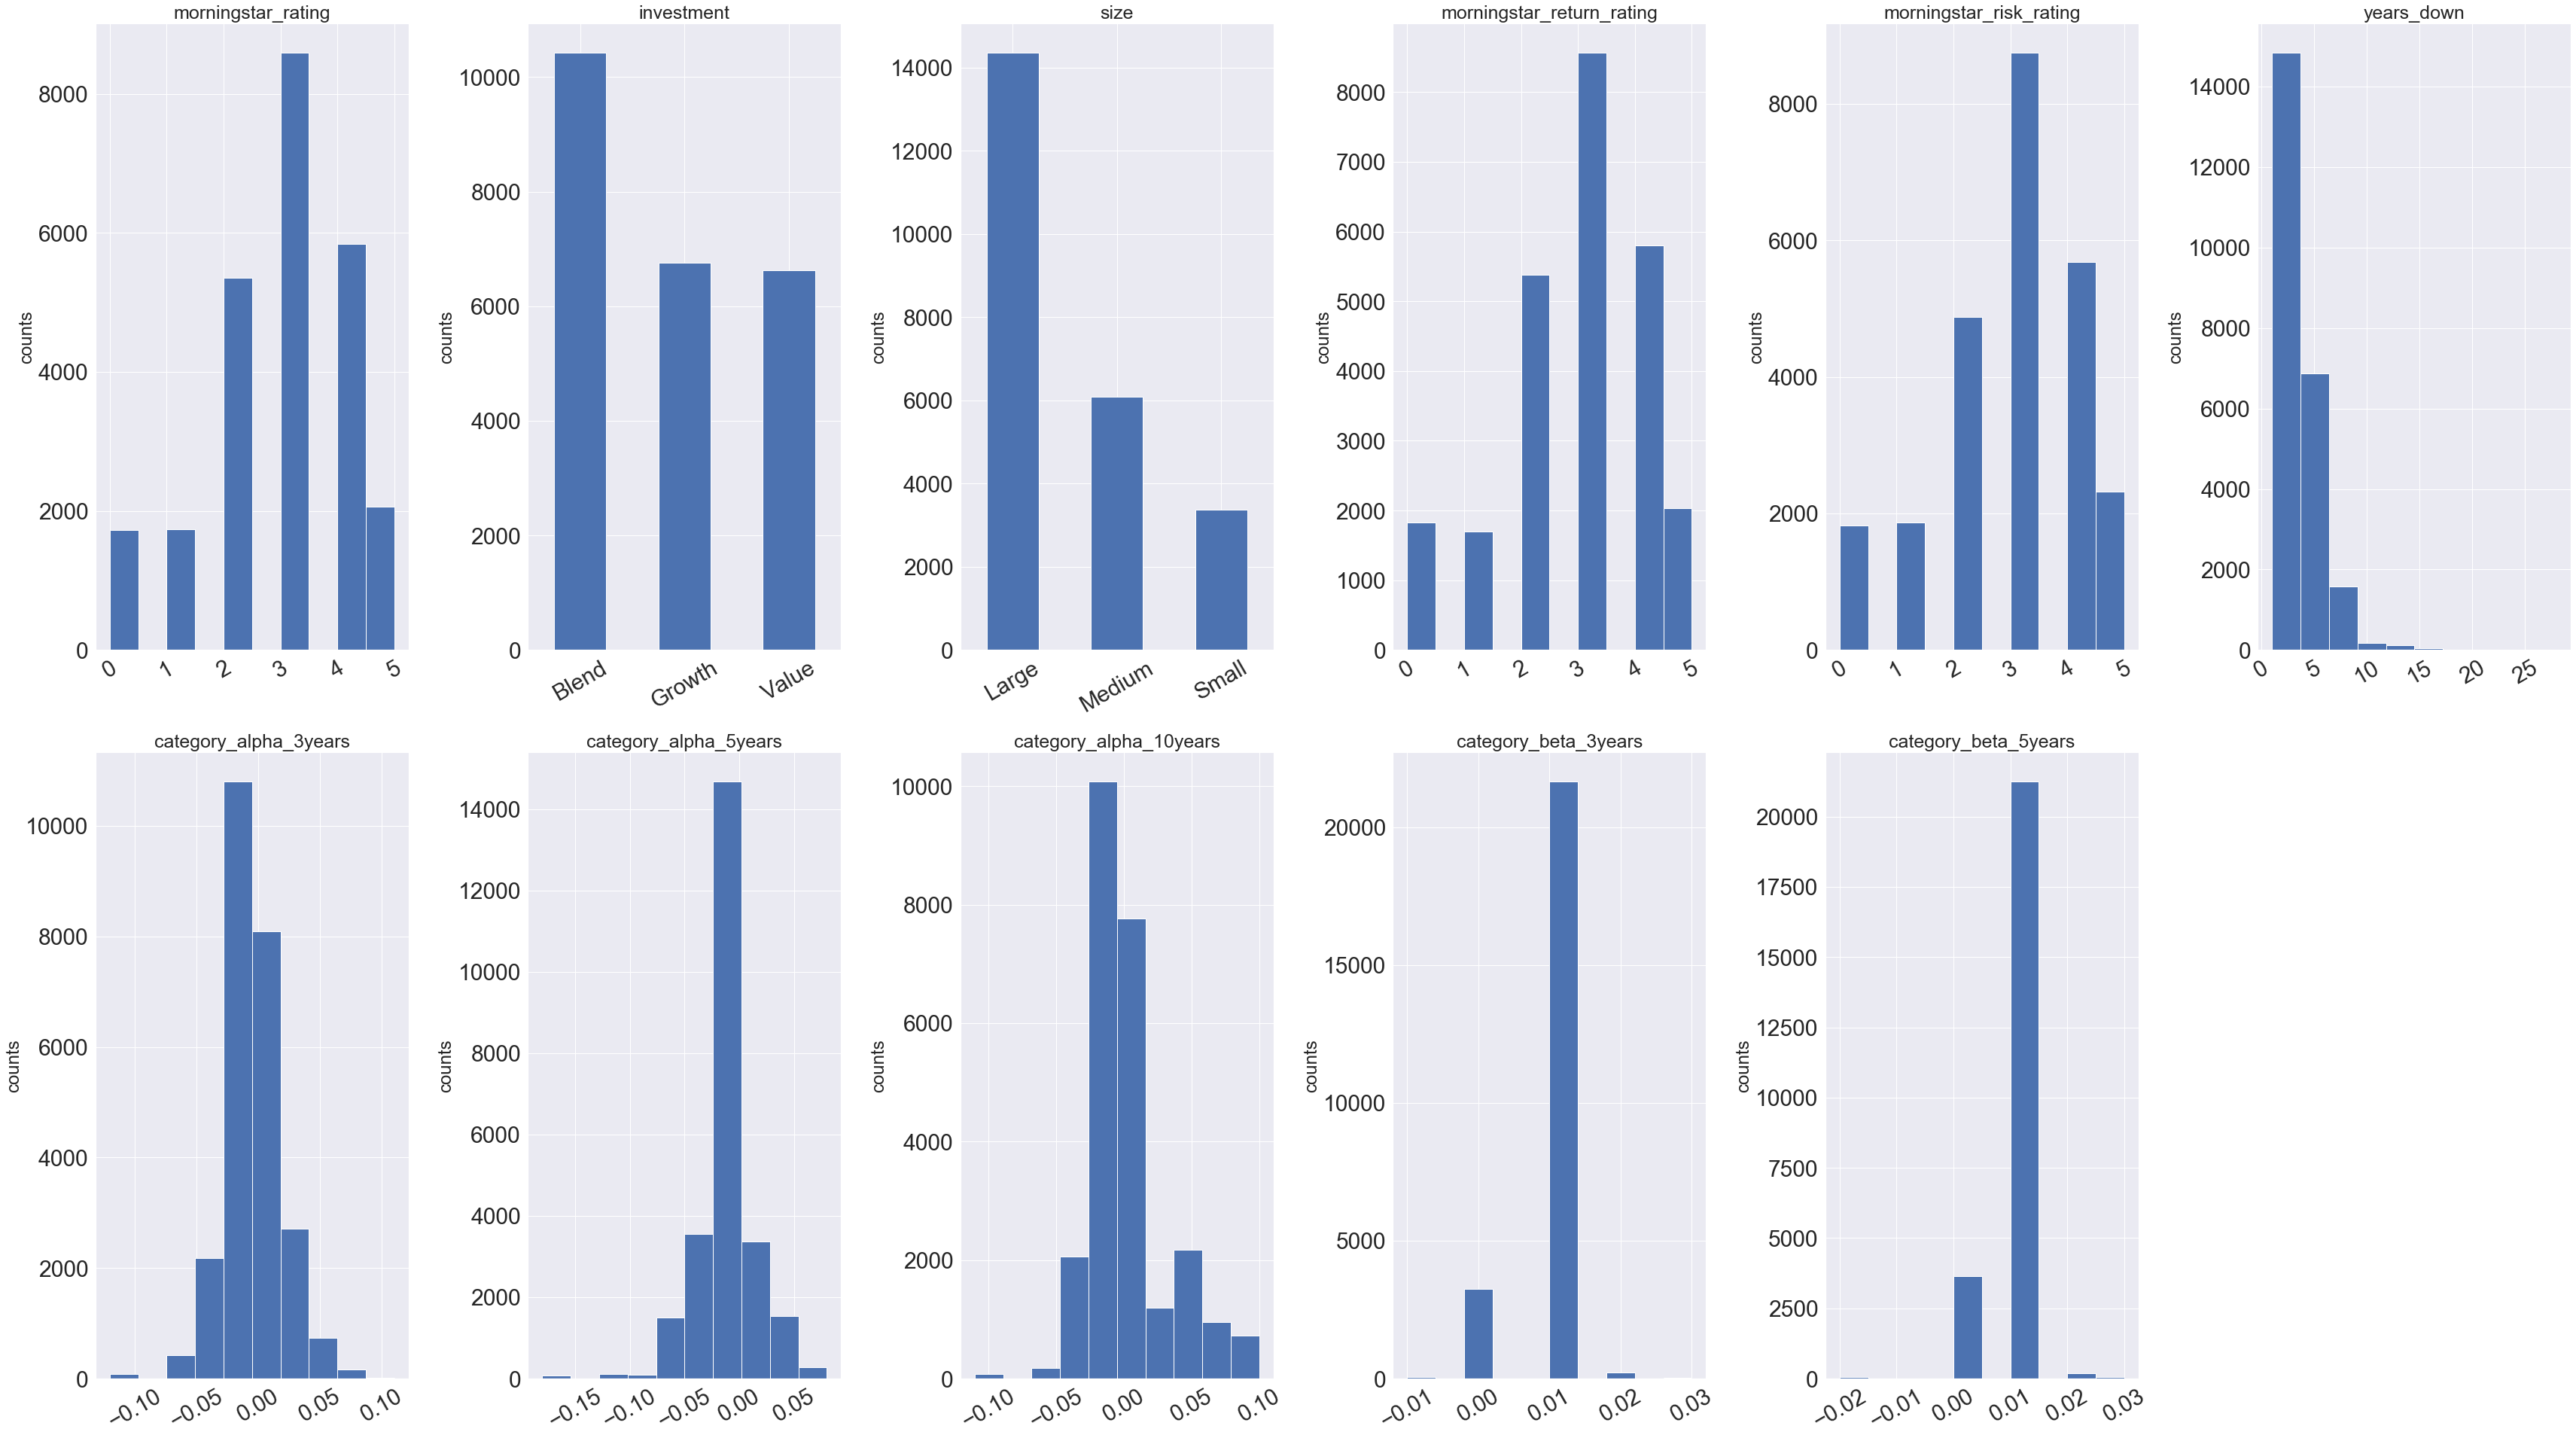

In [20]:
hist_bar_plot(df_mf)

In [21]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

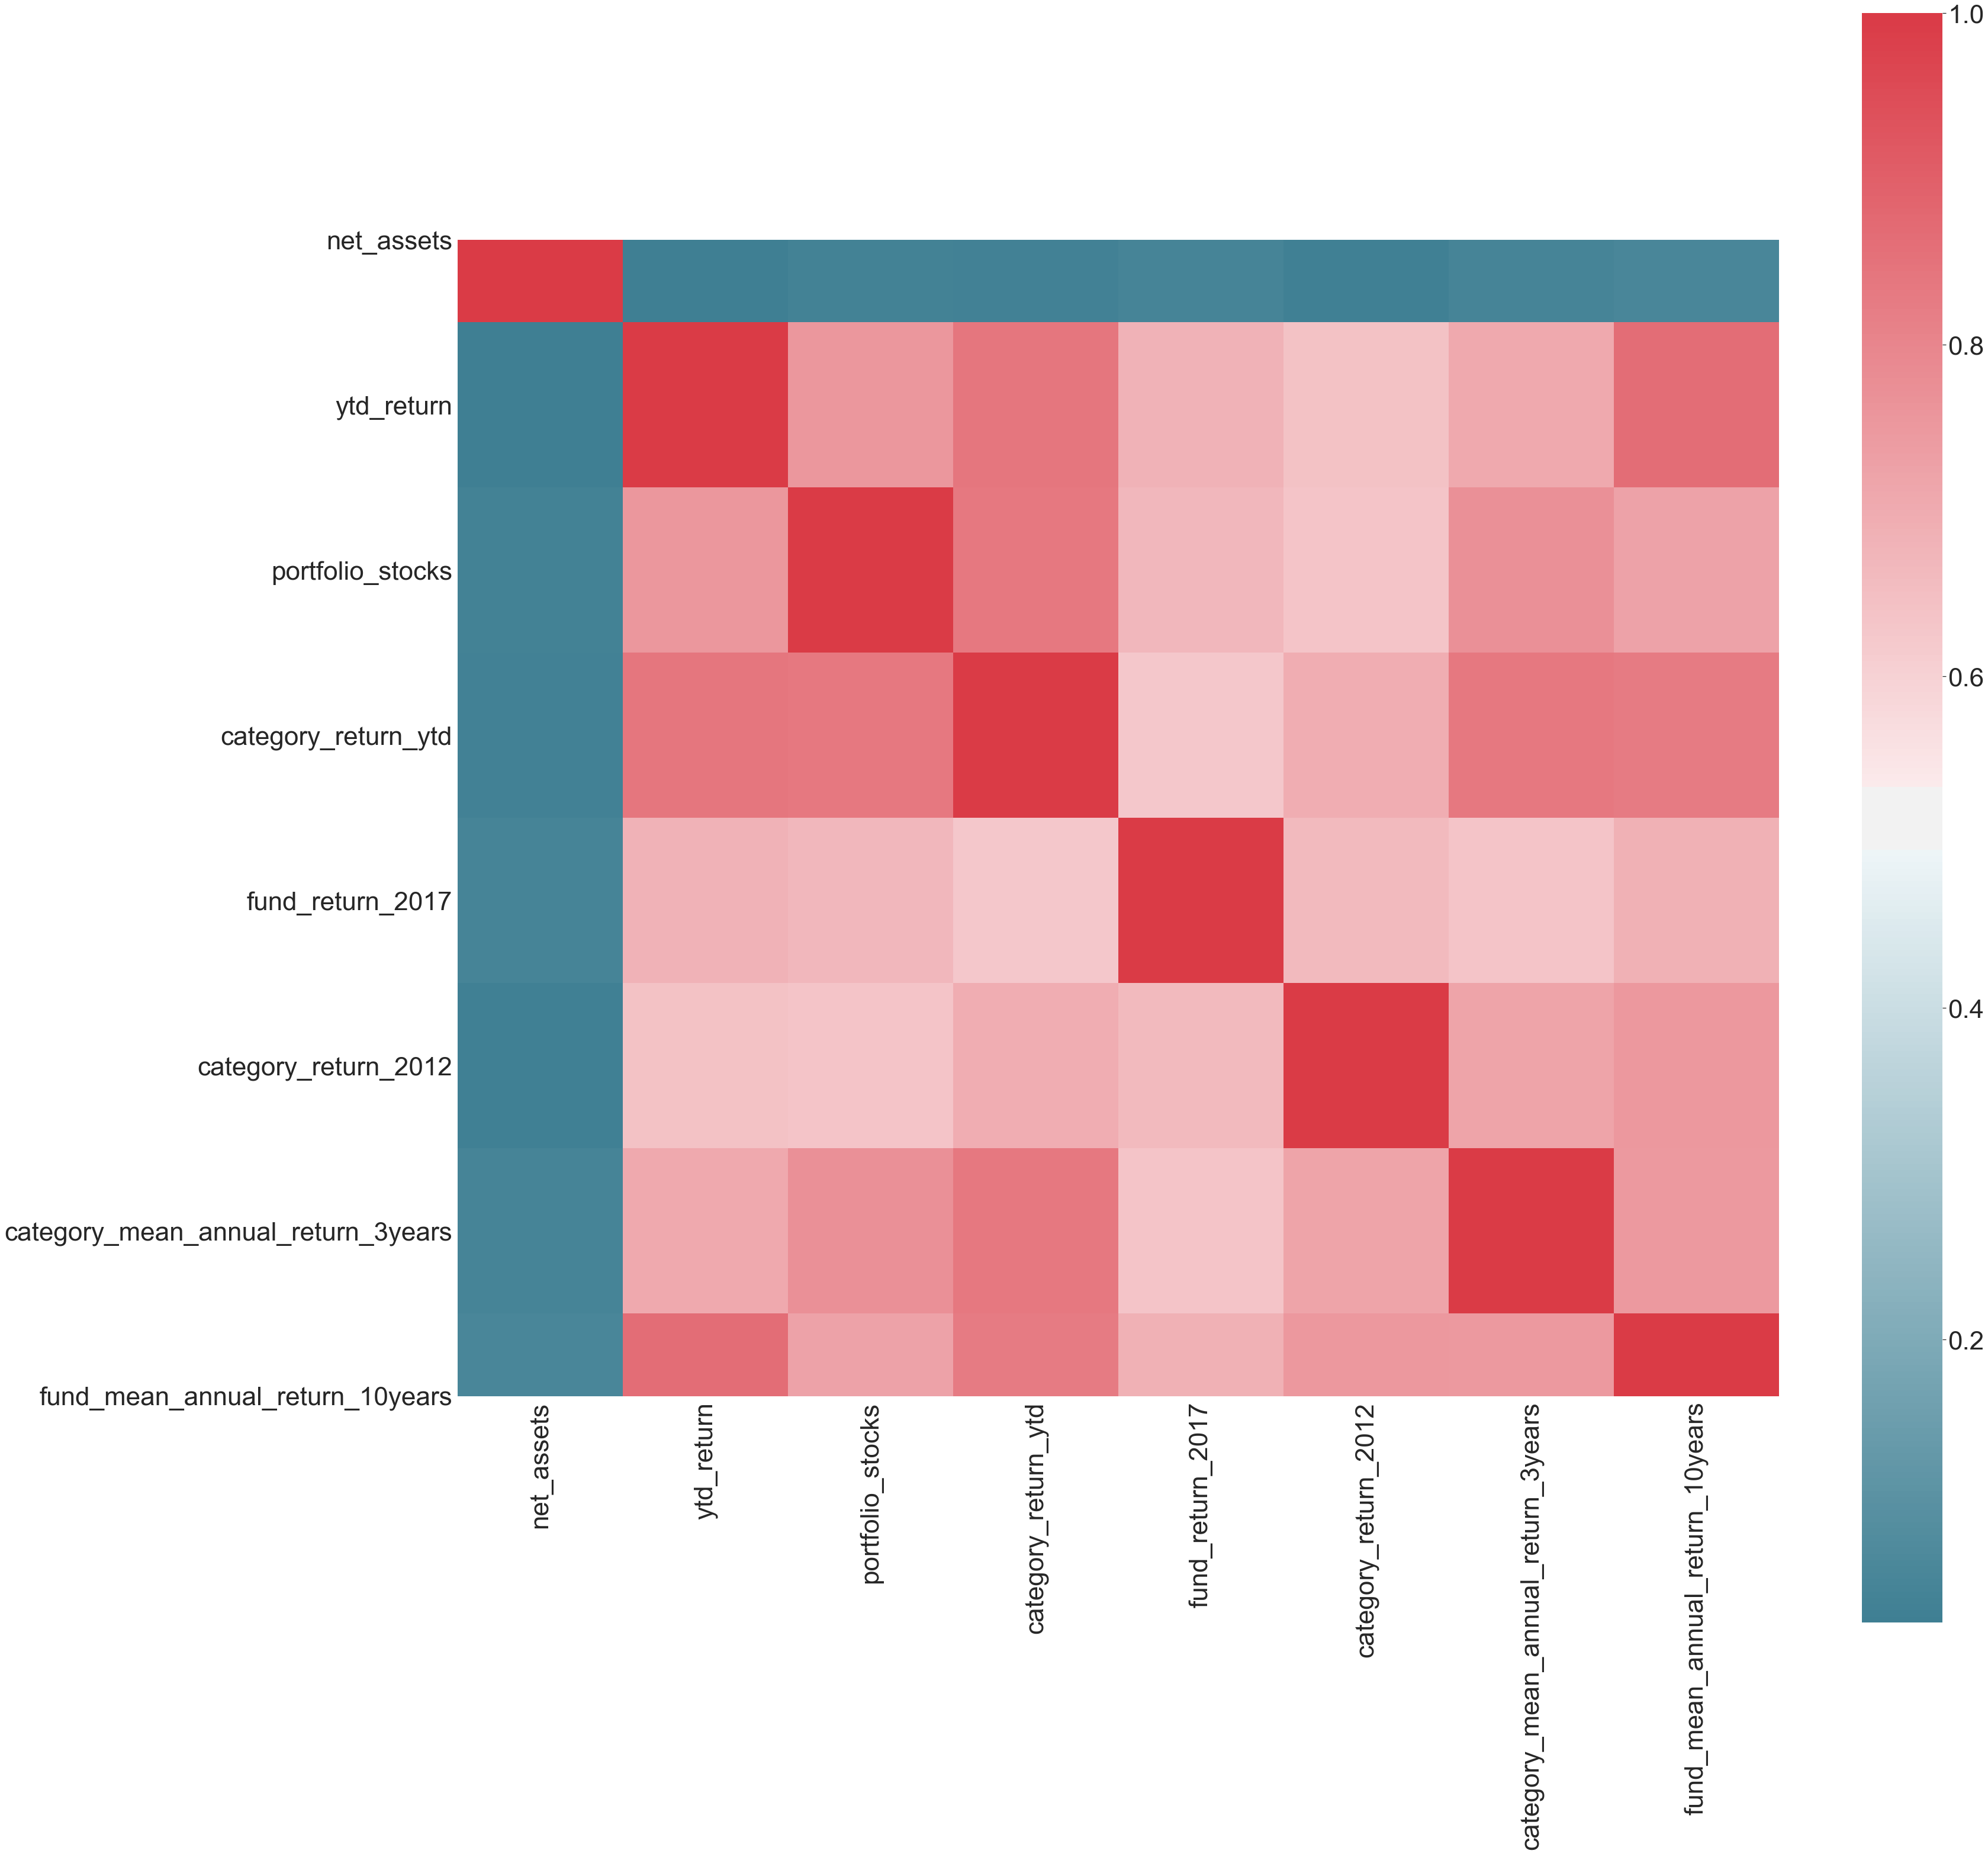

In [22]:
corr_mtx(df_mf, unique=False)

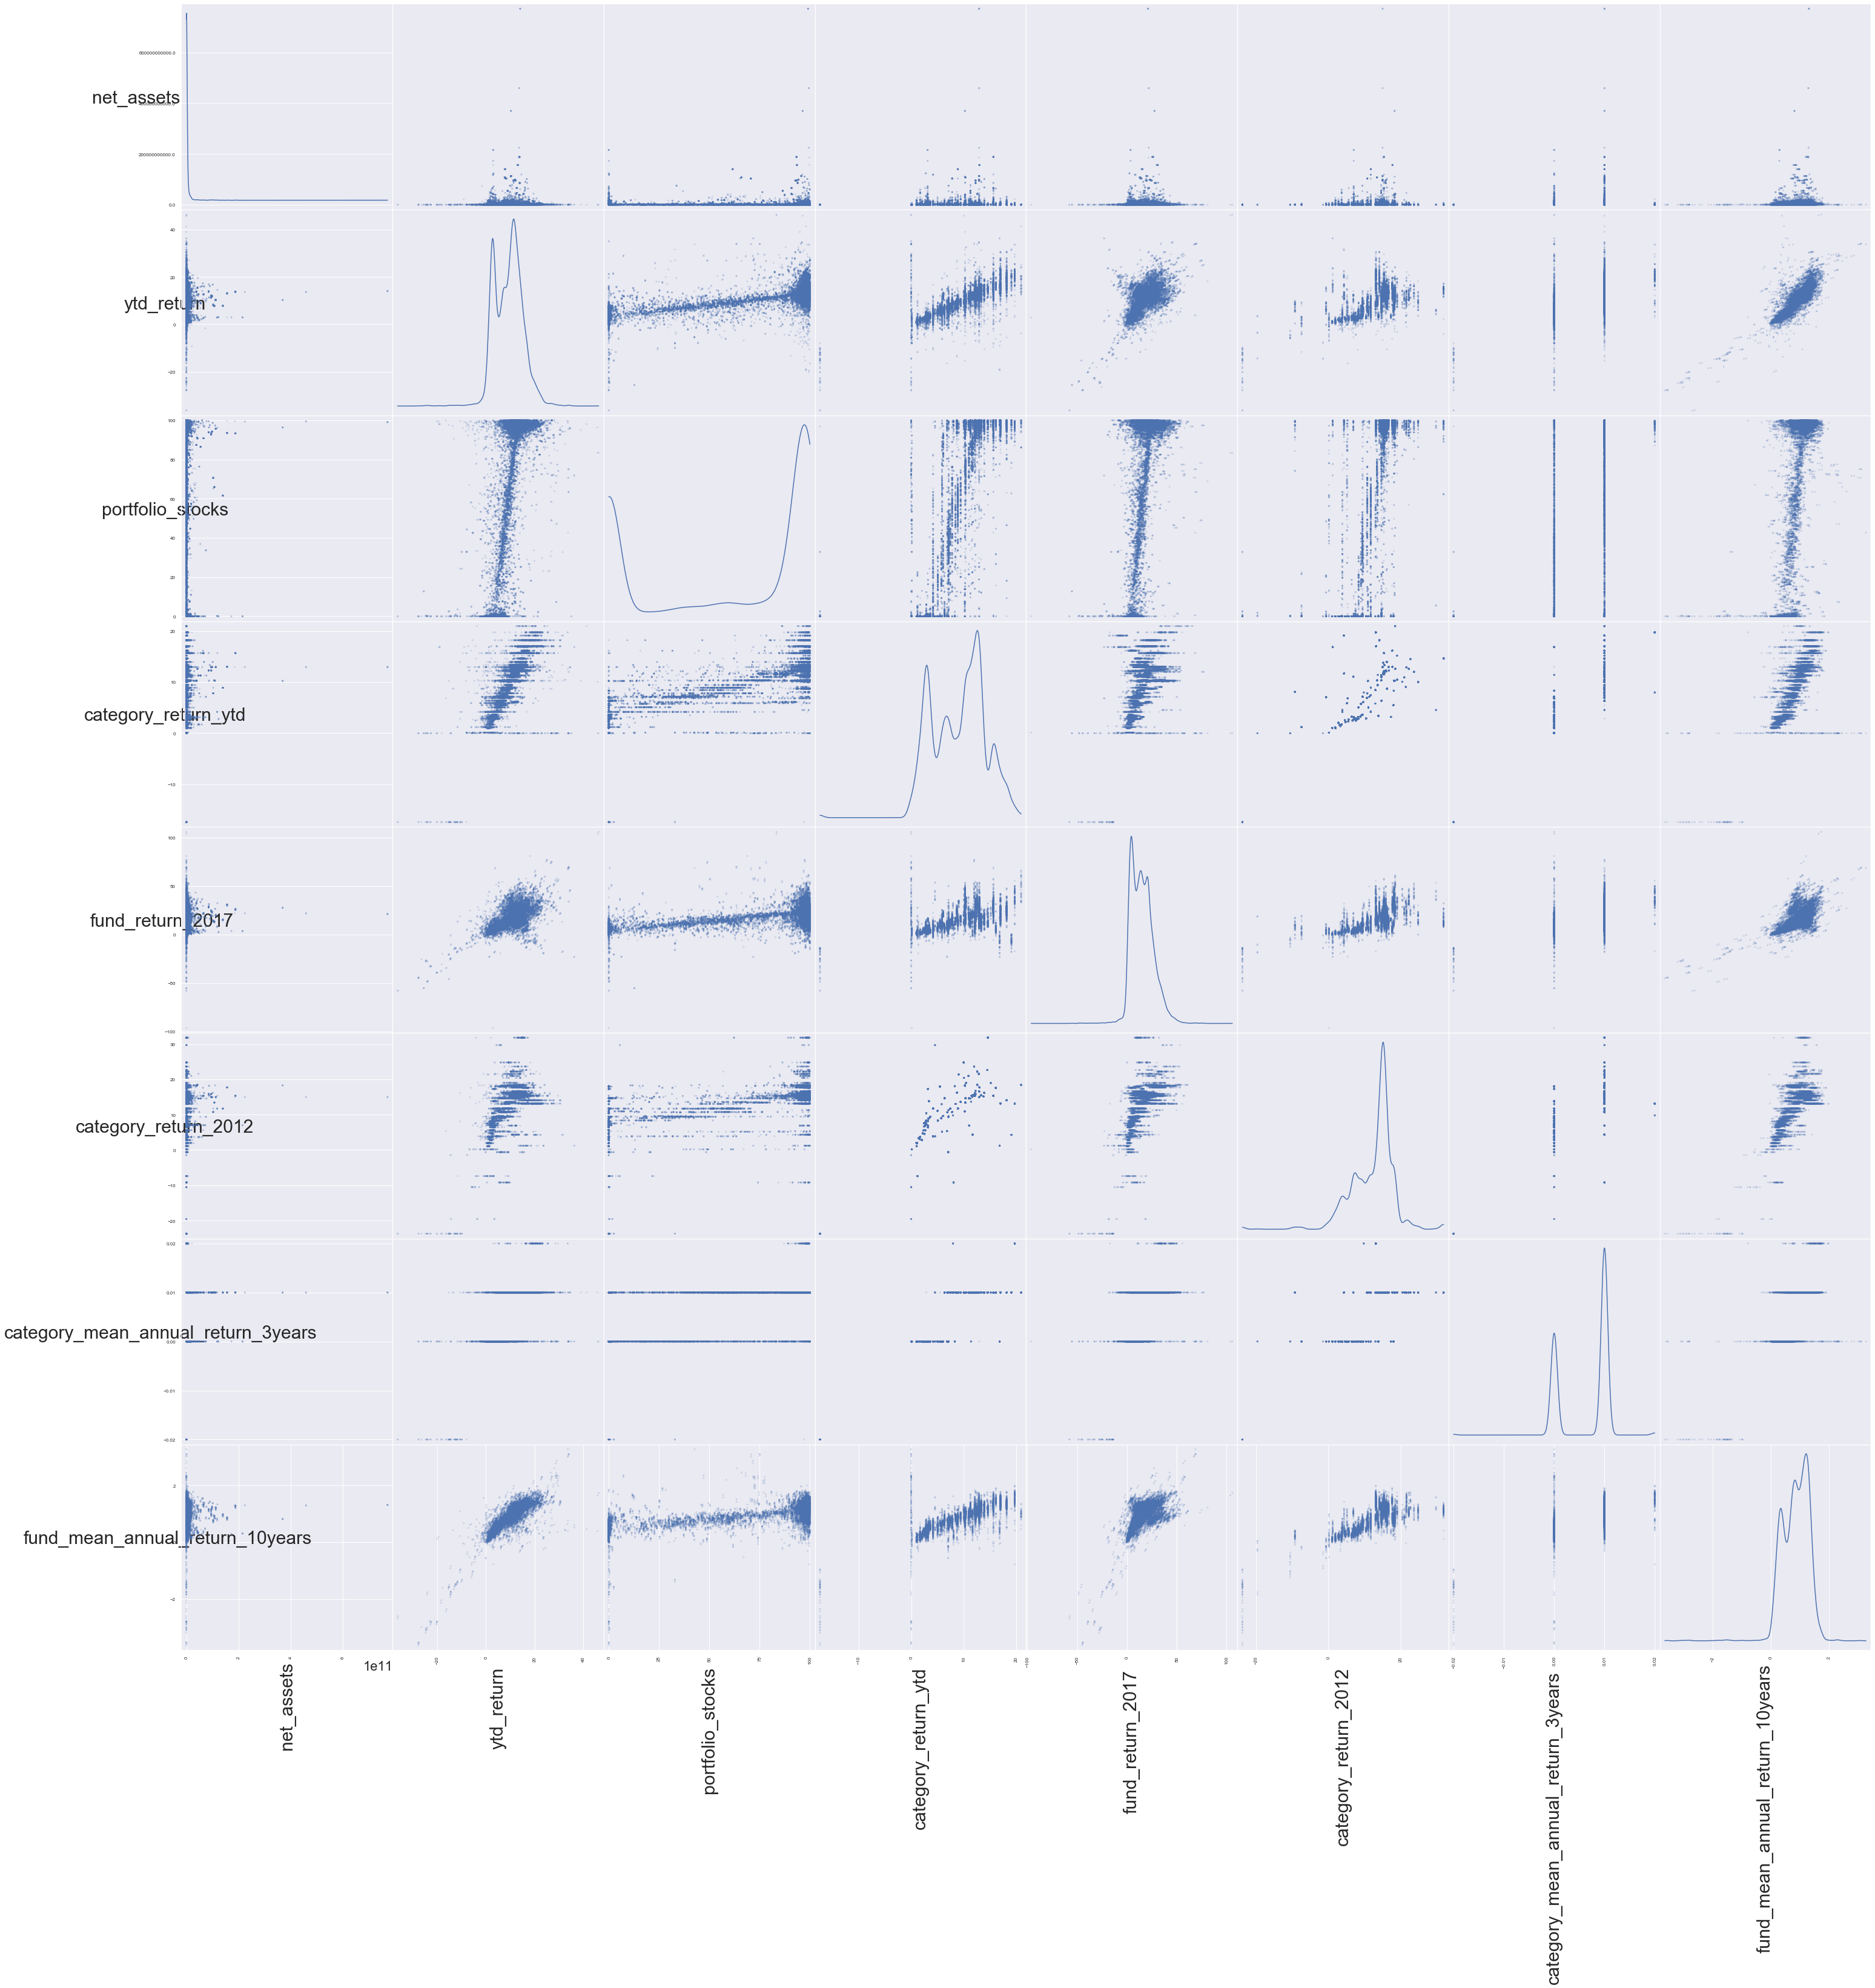

In [23]:
scatter_mtx(df_mf, cap=20)